# 09 overpass-turbo.eu comparisons - part 2

***28 Aug 2020***

This notebook compares the results of the `gdf_from_XXXX()` functions to results running the same query on https://overpass-turbo.eu.

Note the specific format of the wizard query to limit relations to multipolygon relations:

`(type:node or type:way or (type:relation and type=multipolygon)) and amenity=school in Berlin`

In [1]:
%load_ext autoreload
%autoreload 2

import osmnx as ox # using fork `New geometries module - Work In Progress`
ox.utils.config(use_cache=True, log_console=True)

import matplotlib.pyplot as plt

import geopandas as gpd
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

local_file_path = '/media/nick/WDBlue/osmnx/overpass_turbo_results/'

In [2]:
def comparison_report(osmnx_result, overpassturbo_result, query_polygon):
    comparison_df = pd.concat([osmnx_result.geom_type.value_counts(),
                               overpassturbo_result.geom_type.value_counts()], axis=1)
    comparison_df.rename(columns={0:'osmnx', 1:'overpass-turbo'}, inplace=True)

    print(len(set(osmnx_result['unique_id']).intersection(set(overpassturbo_result['@id']))),
          "ids that are in both data frames\n"
    )
    
    url = "https://www.openstreetmap.org/"
    ids_not_in_both = set(osmnx_result['unique_id']).symmetric_difference(set(overpassturbo_result['@id']))
    print(f"{len(ids_not_in_both)} ids that are not in both dataframes")
    
    print("\nids not in overpassturbo_result:\n"
          f"{[url + _id for _id in set(osmnx_result['unique_id']).difference(set(overpassturbo_result['@id']))]}")
    print("ids not in osmnx_result:\n"
          f"{[url + _id for _id in set(overpassturbo_result['@id']).difference(set(osmnx_result['unique_id']))]} \n")

    print(comparison_df)
    
    if len(ids_not_in_both)>0:
        ax=query_polygon.plot(figsize=(8,8))
        osmnx_result[osmnx_result['unique_id'].isin(ids_not_in_both)].plot(ax=ax, color='red')
        overpassturbo_result[overpassturbo_result['@id'].isin(ids_not_in_both)].plot(ax=ax, color='green')
        
        # minx, miny, maxx, maxy
        tba = osmnx_result[osmnx_result['unique_id'].isin(ids_not_in_both)].total_bounds
        tbb = overpassturbo_result[overpassturbo_result['@id'].isin(ids_not_in_both)].total_bounds
        tb = np.array([tba, tbb])
        tb_max = np.nanmax(tb, axis=0)
        tb_min = np.nanmin(tb, axis=0)
        left = tb_min[0]
        right = tb_max[2]
        extra_width = (right-left) + 0.01
        top = tb_max[3]
        bottom = tb_min[1]
        extra_height = (top-bottom) + 0.01
        ax.set_xlim(left-extra_width, right+extra_width)
        ax.set_ylim(bottom-extra_height, top+extra_height)


# Service roads, Tokyo

overpass-turbo.eu wizard query:

`(type:node or type:way or (type:relation and type=multipolygon)) and highway=service in Tokyo`

#### Results noted at bottom of map:
points:0, lines: 48204, poligons:37

In [3]:
%%time
place='Tokyo, Japan'
tags={'highway': 'service'}
# run the query through gdf_from_place and count geometries
query_polygon = ox.geocode_to_gdf(place)
osmnx_result = ox.gdf_from_place(place, tags=tags)

CPU times: user 1min 49s, sys: 787 ms, total: 1min 50s
Wall time: 1min 50s


In [4]:
%%time
# Read in the overpass-turbo.eu results and count geometries
overpassturbo_result = gpd.read_file(local_file_path + 'highway_service_Tokyo.geojson')

CPU times: user 7.95 s, sys: 272 ms, total: 8.22 s
Wall time: 8.22 s


48240 ids that are in both data frames

1 ids that are not in both dataframes

ids not in overpassturbo_result:
[]
ids not in osmnx_result:
['https://www.openstreetmap.org/way/275466528'] 

            osmnx  overpass-turbo
LineString  48203           48204
Polygon        37              37


/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


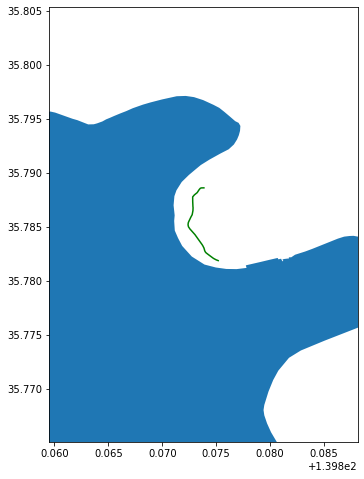

In [5]:
comparison_report(osmnx_result, overpassturbo_result, query_polygon)

# Trees, Delhi

overpass-turbo.eu wizard query:

`(type:node or type:way or (type:relation and type=multipolygon)) and natural=tree in Delhi`

#### Results noted at bottom of map:
points:825, lines: 0, poligons:0

In [6]:
%time
place='Delhi, India'
tags={'natural': 'tree'}
# run the query through gdf_from_place and count geometries
query_polygon = ox.geocode_to_gdf(place)
osmnx_result = ox.gdf_from_place(place, tags=tags)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.01 µs


In [7]:
# Read in the overpass-turbo.eu results and count geometries
overpassturbo_result = gpd.read_file(local_file_path + 'natural_tree_Delhi.geojson')

In [8]:
comparison_report(osmnx_result, overpassturbo_result, query_polygon)

825 ids that are in both data frames

0 ids that are not in both dataframes

ids not in overpassturbo_result:
[]
ids not in osmnx_result:
[] 

       osmnx  overpass-turbo
Point    825             825


# Streams and power towers, Shanghai

overpass-turbo.eu wizard query:

`(type:node or type:way or (type:relation and type=multipolygon)) and waterway=stream or power=tower in 'Shanghai, China'`

points:9390, lines: 457, poligons:0

In [9]:
%%time
place='Shanghai, China'
tags={'waterway': 'stream', 'power': 'tower'}
# run the query through gdf_from_place and count geometries
query_polygon = ox.geocode_to_gdf(place)
osmnx_result = ox.gdf_from_place(place, tags=tags)

CPU times: user 5.94 s, sys: 7.99 ms, total: 5.95 s
Wall time: 5.95 s


In [10]:
# Read in the overpass-turbo.eu results and count geometries
overpassturbo_result = gpd.read_file(local_file_path + 'stream_power_tower_Shanghai.geojson')

In [11]:
comparison_report(osmnx_result, overpassturbo_result, query_polygon)

9847 ids that are in both data frames

0 ids that are not in both dataframes

ids not in overpassturbo_result:
[]
ids not in osmnx_result:
[] 

            osmnx  overpass-turbo
Point        9390            9390
LineString    457             457


# Walls and water, Sāo Paulo

overpass-turbo.eu wizard query:

`(type:node or type:way or (type:relation and type=multipolygon)) and (wall=* or natural=water) in 'Sāo Paulo'`

points:0, lines: 4, poligons:528

In [12]:
%%time
place='Sāo Paulo, Brasil'
tags={'wall': True, 'natural': 'water'}
# run the query through gdf_from_place and count geometries
query_polygon = ox.geocode_to_gdf(place)
osmnx_result = ox.gdf_from_place(place, tags=tags)

CPU times: user 1.52 s, sys: 12 ms, total: 1.53 s
Wall time: 1.53 s


In [13]:
# Read in the overpass-turbo.eu results and count geometries
overpassturbo_result = gpd.read_file(local_file_path + 'wall_natural_water_Sāo_Paulo.geojson')

532 ids that are in both data frames

1 ids that are not in both dataframes

ids not in overpassturbo_result:
['https://www.openstreetmap.org/relation/10991635']
ids not in osmnx_result:
[] 

              osmnx  overpass-turbo
Polygon         527             527
LineString        5               4
MultiPolygon      1               1


/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


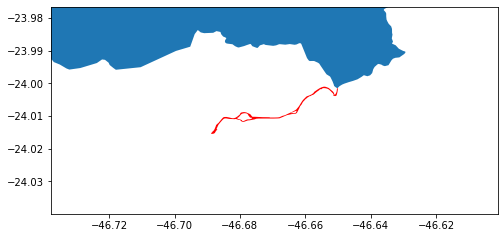

In [14]:
comparison_report(osmnx_result, overpassturbo_result, query_polygon)

# Woods and residential land, Cairo

overpass-turbo.eu wizard query:

`(type:node or type:way or (type:relation and type=multipolygon)) and (natural=wood or landuse=residential) in 'Cairo'`

points:11, lines: 0, poligons:1731

In [15]:
%%time
place='Cairo'
tags={'natural': 'wood', 'landuse': 'residential'}
# run the query through gdf_from_place and count geometries
query_polygon = ox.geocode_to_gdf(place)
osmnx_result = ox.gdf_from_place(place, tags=tags)

CPU times: user 1.22 s, sys: 12 ms, total: 1.23 s
Wall time: 1.23 s


In [16]:
# Read in the overpass-turbo.eu results and count geometries
overpassturbo_result = gpd.read_file(local_file_path + 'wood_residential_Cairo.geojson')

In [17]:
comparison_report(osmnx_result, overpassturbo_result, query_polygon)

1742 ids that are in both data frames

0 ids that are not in both dataframes

ids not in overpassturbo_result:
[]
ids not in osmnx_result:
[] 

         osmnx  overpass-turbo
Polygon   1731            1731
Point       11              11


# Parking, Mumbai

overpass-turbo.eu wizard query:

`(type:node or type:way or (type:relation and type=multipolygon)) and (amenity=parking or service=parking_aisle) in 'Mumbai'`

points:45, lines: 32, poligons:88

In [18]:
%%time
place='Mumbai'
tags={'amenity': 'parking', 'service': 'parking_aisle'}
# run the query through gdf_from_place and count geometries
query_polygon = ox.geocode_to_gdf(place)
osmnx_result = ox.gdf_from_place(place, tags=tags)

CPU times: user 443 ms, sys: 0 ns, total: 443 ms
Wall time: 442 ms


In [19]:
# Read in the overpass-turbo.eu results and count geometries
overpassturbo_result = gpd.read_file(local_file_path + 'parking_service_parking_aisle_Mumbai.geojson')

In [20]:
comparison_report(osmnx_result, overpassturbo_result, query_polygon)

165 ids that are in both data frames

0 ids that are not in both dataframes

ids not in overpassturbo_result:
[]
ids not in osmnx_result:
[] 

            osmnx  overpass-turbo
Polygon        88              88
Point          45              45
LineString     32              32


# Paths and power poles, Beijing

overpass-turbo.eu wizard query:

`(type:node or type:way or (type:relation and type=multipolygon)) and (highway=path or power=pole) in 'Beijing'`

points:28, lines: 3743, poligons:0

In [21]:
%%time
place='Beijing'
tags={'highway': 'path', 'power': 'pole'}
# run the query through gdf_from_place and count geometries
query_polygon = ox.geocode_to_gdf(place)
osmnx_result = ox.gdf_from_place(place, tags=tags)

CPU times: user 8.2 s, sys: 12 ms, total: 8.21 s
Wall time: 8.21 s


In [22]:
overpassturbo_result = gpd.read_file(local_file_path + 'path_power_pole_Beijing.geojson')

In [23]:
comparison_report(osmnx_result, overpassturbo_result, query_polygon)

3771 ids that are in both data frames

0 ids that are not in both dataframes

ids not in overpassturbo_result:
[]
ids not in osmnx_result:
[] 

            osmnx  overpass-turbo
LineString   3743            3743
Point          28              28


# Natural, residential, tertiary, Dhaka, Bangladesh

overpass-turbo.eu wizard query:

`(type:node or type:way or (type:relation and type=multipolygon)) and (natural=* or landuse=residential or highway=tertiary) in 'Dhaka District'`

points:8682, lines: 807, poligons:5219

*Note: I had some issues getting the geocoded geometry to match up on these two queries (one to osmnx, one to overpass-turbo)*

In [24]:
%%time
place='Dhaka District, Bangladesh'
tags={'natural': True, 'landuse': 'residential', 'highway': 'tertiary'}
# run the query through gdf_from_place and count geometries
query_polygon = ox.geocode_to_gdf(place)
osmnx_result = ox.gdf_from_place(place, tags=tags)

CPU times: user 3.51 s, sys: 44 ms, total: 3.55 s
Wall time: 3.55 s


In [25]:
overpassturbo_result = gpd.read_file(local_file_path + 'natural_residential_tertiary_Dhaka.geojson')

14707 ids that are in both data frames

1 ids that are not in both dataframes

ids not in overpassturbo_result:
[]
ids not in osmnx_result:
['https://www.openstreetmap.org/node/3512879150'] 

              osmnx  overpass-turbo
Point          8681            8682
Polygon        5216            5216
LineString      807             807
MultiPolygon      3               3


/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


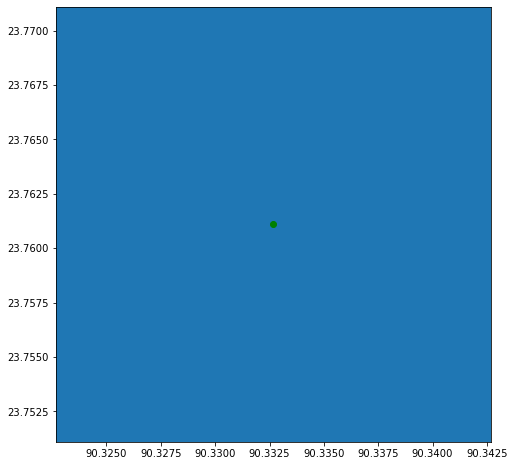

In [26]:
comparison_report(osmnx_result, overpassturbo_result, query_polygon)

In [27]:
overpassturbo_result[overpassturbo_result['@id'] == 'node/3512879150']

,id,@id,name,natural,type,water,wikidata,boat,name:bn,name:en,source,wikipedia,landuse,layer,addr:city,addr:postcode,addr:street,alt_name,note,ship,created_by,addr:suburb,waterway,barrier,intermittent,area,addr:housenumber,operator,parking,residential,website,building,leisure,place,addr:place,building:condition,building:levels,building:material,building:soft_storey,wetland,salt,canoe,motorboat,ele,street,opening_hours,phone,Area,ADDRESS,material,seasonal,content,description,cuisine,internet_access,smoking,wheelchair,leaf_type,fishing,man_made,email,level,Children,Household,Resource Center,Slum,addr:country,population,waterland,highway,leaf_cycle,surface,tidal,image,@relations,horse,lanes,maxspeed,oneway,sidewalk,bicycle,foot,lit,fixme,access,lanes:backward,lanes:forward,maxspeed:type,noname,width,motor_vehicle,bridge,smoothness,bus,cycleway:left,maxheight,ref,service,vehicle,is_in,tunnel,motorcar,motorcycle,construction,junction,covered,postal_code,ford,maxspeed:advisory,maxweight:signed,denotation,amenity,species:bn,product,genus,species,taxon,height,name_1,order,shop,diameter_crown,circumference,geometry
6858,node/3512879150,node/3512879150,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[ { ""role"": ""outer"", ""rel"": 3400205, ""reltags""...",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,POINT (90.33267 23.76109)


# Farmland, forest, bridge, Osaka

overpass-turbo.eu wizard query:

`(type:node or type:way or (type:relation and type=multipolygon)) and (landuse=farmland or landuse=forest or bridge=yes) in 'Osaka'`

points:3, lines: 11169, poligons: 6085

In [28]:
%%time
place='Osaka'
tags={'landuse': ['farmland', 'forest'], 'bridge': 'yes'}
# run the query through gdf_from_place and count geometries
query_polygon = ox.geocode_to_gdf(place)
osmnx_result = ox.gdf_from_place(place, tags=tags)

CPU times: user 8.32 s, sys: 332 ms, total: 8.65 s
Wall time: 8.65 s


In [29]:
overpassturbo_result = gpd.read_file(local_file_path + 'farmland_forest_bridge_Osaka.geojson')

17257 ids that are in both data frames

1 ids that are not in both dataframes

ids not in overpassturbo_result:
['https://www.openstreetmap.org/way/53203179']
ids not in osmnx_result:
[] 

              osmnx  overpass-turbo
LineString    11169           11169
Polygon        6080            6079
MultiPolygon      6               6
Point             3               3


/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


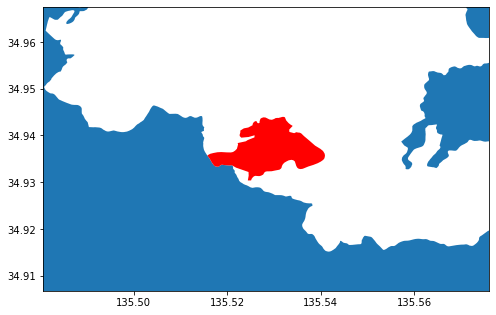

In [30]:
comparison_report(osmnx_result, overpassturbo_result, query_polygon)

# Cafe, grass, New York City

overpass-turbo.eu wizard query:

`(type:node or type:way or (type:relation and type=multipolygon)) and (highway=* or landuse=grass) in 'New York City'`

points:1580, lines: 5, poligons: 3184

*Note: the geometries missing from the osmnx result are because they are not tagged with role=outer.*

In [31]:
%%time
place='New York City'
tags={'amenity': 'cafe', 'landuse': 'grass'}
# run the query through gdf_from_place and count geometries
query_polygon = ox.geocode_to_gdf(place)
osmnx_result = ox.gdf_from_place(place, tags=tags)

CPU times: user 1.98 s, sys: 8.02 ms, total: 1.99 s
Wall time: 1.98 s


In [32]:
overpassturbo_result = gpd.read_file(local_file_path + 'cafe_grass_New_York_City.geojson')

4764 ids that are in both data frames

5 ids that are not in both dataframes

ids not in overpassturbo_result:
[]
ids not in osmnx_result:
['https://www.openstreetmap.org/way/387468103', 'https://www.openstreetmap.org/way/478534136', 'https://www.openstreetmap.org/way/387468724', 'https://www.openstreetmap.org/way/387468104', 'https://www.openstreetmap.org/way/387468723'] 

               osmnx  overpass-turbo
Polygon       3175.0            3170
Point         1580.0            1580
MultiPolygon     9.0              14
LineString       NaN               5


/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


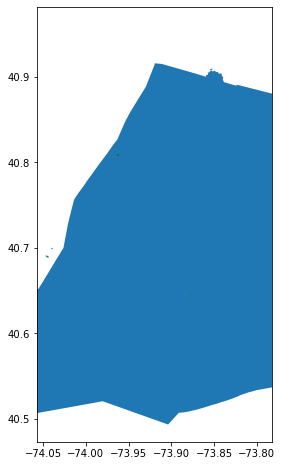

In [33]:
comparison_report(osmnx_result, overpassturbo_result, query_polygon)

# Nightclub, New Alresford, Hampshire

overpass-turbo.eu wizard query:

`(type:node or type:way or (type:relation and type=multipolygon)) and (amenity=nightclub) in 'New Alresford, Hampshire'`

points:0, lines: 0, poligons: 0

*Note: Testing creation of empty GeoDataFrame from empty overpass response*

In [34]:
%%time
place='New Alresford, Hampshire'
tags={'amenity': 'nightclub'}
# run the query through gdf_from_place and count geometries
query_polygon = ox.geocode_to_gdf(place)
osmnx_result = ox.gdf_from_place(place, tags=tags)

CPU times: user 186 ms, sys: 4.04 ms, total: 190 ms
Wall time: 189 ms


In [35]:
osmnx_result

,geometry
